In [ ]:
%pip install qiskit cirq

In [2]:
#oracle FN
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def oracle():
    type = random.choice(["constant", "balanced"])
    result = QuantumCircuit(2)
    result.barrier()
    
    if type == "constant":
        # we ignore the input and randomly add a not gate
        if random.randrange(2) == 0:
            result.x(1)
    elif type == "balanced":
        # making sure the output is balanced
        result.cx(0, 1)
        # and randomly inverting it
        if random.randrange(2) == 0:
            result.x(1)
    
    result.barrier()
    return result

import random
from qiskit import QuantumCircuit

def oraclej(n):
    result = QuantumCircuit(n+1)
    result.barrier()
    
    type = random.choice(["constant", "balanced"])
    if type == "constant":
        # we ignore the input and randomly add a not gate
        if random.randrange(2) == 0:
            result.x(n)
    else:
        # we can add a single cnot to the circuit to have a balanced function
        # but we decide on the control qubit randomly
        control = random.randrange(n)
        result.cx(control, n)
        # randomly invert the result
        if random.randrange(2) == 0:
            result.x(n)
    
    result.barrier()
    return result

def bv_oracle():
    s="11010"
    n = len(s)
    s = s[::-1] # we revert the string since s_0 is at the left according to python 
    # and in the right according to qiskit
    
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    
    for i in range(n):
        if s[i] == '1':
            circuit.cx(i, n)
    
    circuit.barrier()
    return circuit

def f(x):
    if x=="000":
        return "001"
    elif x=="010":
        return "001"
    elif x=="011":
        return "000"
    elif x=="001":
        return "000"
    elif x=="100":
        return "101"
    elif x=="110":
        return "001"
    elif x=="111":
        return "100"
    elif x=="101":
        return "100"

def simon_oracle():
    qreg1 = QuantumRegister(3, "register_1")
    qreg2 = QuantumRegister(3, "register_2")
    creg = ClassicalRegister(3)

    simon_circuit = QuantumCircuit(qreg1, qreg2, creg)

    #map 000 and 010 to 000
    #Do nothing

    #map 111 to 100
    simon_circuit.mcx([0,1,2],5) 
    simon_circuit.barrier()

    #map 101 to 100
    simon_circuit.x(1)
    simon_circuit.mcx([0,1,2],5)
    simon_circuit.x(1)
    simon_circuit.barrier()

    #map 110 to 110
    simon_circuit.x(0)
    simon_circuit.mcx([0,1,2],4)
    simon_circuit.mcx([0,1,2],5)
    simon_circuit.x(0)
    simon_circuit.barrier()

    #map 100 to 110
    simon_circuit.x(0)
    simon_circuit.x(1)
    simon_circuit.mcx([0,1,2],4)
    simon_circuit.mcx([0,1,2],5)
    simon_circuit.x(0)
    simon_circuit.x(1)
    simon_circuit.barrier()    
    
    #map 001 to 010
    simon_circuit.x(1)
    simon_circuit.x(2)
    simon_circuit.mcx([0,1,2],4)
    simon_circuit.x(1)
    simon_circuit.x(2)
    simon_circuit.barrier()
    
    #map 011 to 010
    simon_circuit.x(2)
    simon_circuit.mcx([0,1,2],4)
    simon_circuit.x(2)
  

    return simon_circuit
    

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

circuit = QuantumCircuit(2, 1)

# Apply X and H to qubit 1
circuit.x(1)
circuit.h(1)

# Apply H to qubit 0
circuit.h(0)

# Apply oracle
circuit.compose(oracle(), inplace=True)

# Apply H to qubit 0
circuit.h(0)

# Measure qubit 0
circuit.measure(0, 0)

display(circuit.draw(output='mpl'))

job = AerSimulator().run(circuit,shots=10000)
counts = job.result().get_counts()
print(counts)

In [ ]:
#Deutsch-Jozsa Algorithm

import random
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

n=4
#dj_circuit = QuantumCircuit(n+1, n)
q=QuantumRegister(n,"q")
a=QuantumRegister(1,"a")
c=ClassicalRegister(n,"c")
dj_circuit=QuantumCircuit(q,a,c)


dj_circuit.x(n)
dj_circuit.barrier()
for i in range(5):
    dj_circuit.h(i)

dj_circuit.compose(oraclej(n), inplace=True)

for i in range(4):
    dj_circuit.h(i)
    dj_circuit.measure(i,c[i])
    
display(dj_circuit.draw(output='mpl',reverse_bits=True))

job= AerSimulator().run(dj_circuit, shots=100)
counts= job.result().get_counts()
print(counts)

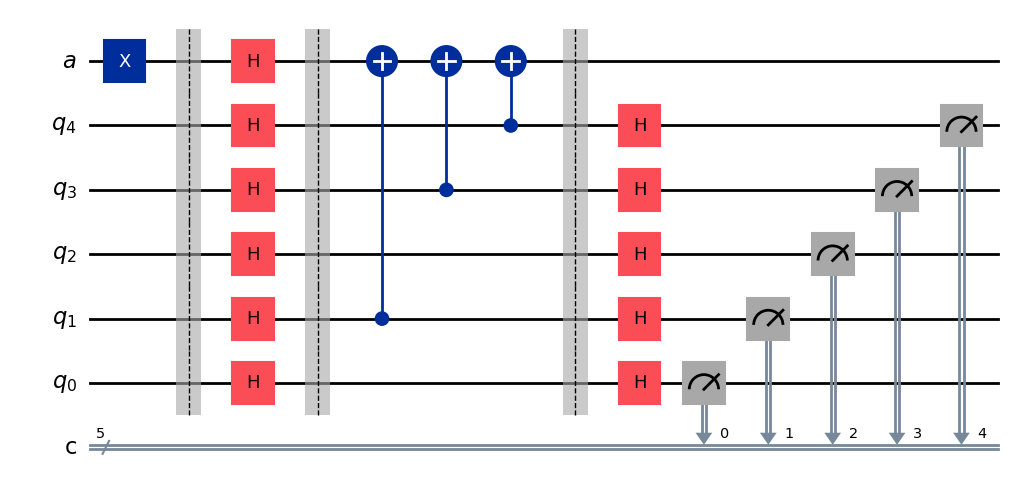

{'11010': 10000}


In [3]:
#Bernstein-Vazirani Algorithm
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import random
n=5
#Your code here
q=QuantumRegister(n,"q")
a=QuantumRegister(1,"a")
c=ClassicalRegister(n,"c")
bv_circuit=QuantumCircuit(q,a,c)
bv_circuit.x(a)
bv_circuit.barrier()
bv_circuit.h(q)
bv_circuit.h(a)

bv_circuit.compose(bv_oracle(), inplace=True)
bv_circuit.h(q)
bv_circuit.measure(q,c)

display(bv_circuit.draw(output='mpl',reverse_bits=True))

job = AerSimulator().run(bv_circuit,shots=10000)
counts = job.result().get_counts()
print(counts)

In [ ]:
# Lab Assignment 8
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, random_statevector
import random

# Oracle Fn
def oracle(s):
   
    n = len(s)
    qr = QuantumRegister(n, 'q')
    a = QuantumRegister(1, 'a')
    
    circuit = QuantumCircuit(qr, a, name='Oracle')
    circuit.barrier(label='Before Oracle')
    for i in range(len(s)):
        if s[i] == '1':
            circuit.cx(qr[len(s)-1-i], a)
    
    display(circuit.draw(output='mpl',reverse_bits=True))
    circuit.barrier(label='After Oracle')
    return circuit

n = 6
q = QuantumRegister(n, "q")
a = QuantumRegister(1, "a")
c = ClassicalRegister(n, "c")
bv_circuit = QuantumCircuit(q, a, c)
bv_circuit.x(a)
bv_circuit.barrier()
bv_circuit.h(q)
bv_circuit.h(a)
s = "011010" #Secret
bv_circuit.compose(oracle(s),inplace=True)
bv_circuit.h(q)
display(Statevector(bv_circuit).draw('latex'))
bv_circuit.measure(q, c)

display(bv_circuit.draw(output='mpl', reverse_bits=True, cregbundle=True))

job = AerSimulator().run(bv_circuit, shots=10000)
counts = job.result().get_counts()
print(counts)